In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd

In [ ]:
print(tf.__version__)

2.15.0


In [ ]:
df= pd.read_csv("/content/drive/MyDrive/comment toxicity /jigsaw-toxic-comment-classification-challenge/train.csv/train.csv")

In [ ]:
df.shape

(159571, 8)

In [ ]:
df.head(20)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [ ]:
df.iloc[10]['comment_text']

'"\nFair use rationale for Image:Wonju.jpg\n\nThanks for uploading Image:Wonju.jpg. I notice the image page specifies that the image is being used under fair use but there is no explanation or rationale as to why its use in Wikipedia articles constitutes fair use. In addition to the boilerplate fair use template, you must also write out on the image description page a specific explanation or rationale for why using this image in each article is consistent with fair use.\n\nPlease go to the image description page and edit it to include a fair use rationale.\n\nIf you have uploaded other fair use media, consider checking that you have specified the fair use rationale on those pages too. You can find a list of \'image\' pages you have edited by clicking on the ""my contributions"" link (it is located at the very top of any Wikipedia page when you are logged in), and then selecting ""Image"" from the dropdown box. Note that any fair use images uploaded after 4 May, 2006, and lacking such a

In [ ]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [ ]:
df[df.columns[2:]]

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
159566,0,0,0,0,0,0
159567,0,0,0,0,0,0
159568,0,0,0,0,0,0
159569,0,0,0,0,0,0


## 1.Preprocess

In [ ]:
X=df['comment_text']
Y=df[df.columns[2:]].values

In [ ]:
X

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

In [ ]:
Y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [ ]:
max_length = [len(sentence.split()) for sentence in X if len(sentence.split())>300]

In [ ]:
len(max_length)

4823

In [ ]:
from tensorflow.keras.layers import TextVectorization

In [ ]:
MAX_FEATURES = 250000

In [ ]:
vectorizer = TextVectorization(max_tokens=250000,
                              output_sequence_length=300,
                              output_mode='int')

In [ ]:
vectorizer.adapt(X.values)

In [ ]:
import json

In [ ]:
with open('/content/drive/MyDrive/comment toxicity /models/vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

In [ ]:
vectorizer_config = vectorizer.get_config()

In [ ]:
filepath= '/content/drive/MyDrive/comment toxicity /models/vectorizer_config.json'

In [ ]:
with open(filepath, 'w') as f:
    json.dump(vectorizer_config, f)

In [ ]:
vectorizer.get_vocabulary()

In [ ]:
len(vectorizer.get_vocabulary())

250000

In [ ]:
vectorizer('Hello world, life is great')[:5]

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([288, 263, 306,   9, 275])>

In [ ]:
vectorized_text = vectorizer(X.values)

In [ ]:
vectorized_text.dtype

tf.int64

In [ ]:
vectorized_text.shape

TensorShape([159571, 300])

In [ ]:
#MCSHBAP - map, chache, shuffle, batch, prefetch  from_tensor_slices, list_file
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, Y))
dataset = dataset.cache()
dataset = dataset.shuffle(200000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(4)

In [ ]:
train = dataset.take(int(len(dataset)*.8))
val = dataset.skip(int(len(dataset)*.8)).take(int(len(dataset)*.1))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

## 2. Create Sequential Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [ ]:
model = Sequential()
# Create the embedding layer
model.add(Embedding(MAX_FEATURES + 1, 32))
# Bidirectional LSTM Layer with specified parameters
model.add(Bidirectional(LSTM(50, activation='tanh', dropout=0.2, recurrent_dropout=0.2)))
# Dense layer with Dropout
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
# Output layer
model.add(Dense(6, activation='sigmoid'))

In [ ]:
model.build(input_shape=(None, None))

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import load_model

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the filepath pattern for saving the model weights
filepath = "/content/drive/MyDrive/comment toxicity models/models/cmnt_epoch_{epoch:02d}_val_loss:{val_loss:.2f}_val_acc:{val_accuracy:.2f}.weights.h5"

# Create a list of callbacks
callbacks = [ModelCheckpoint(filepath=filepath,save_weights_only=False,save_freq="epoch")]

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),loss=BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          8000032   
                                                                 
 bidirectional (Bidirection  (None, 100)               33200     
 al)                                                             
                                                                 
 dense (Dense)               (None, 128)               12928     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 6)                 774       
                                                                 
Total params: 8046934 (30.70 MB)
Trainable params: 8046934 (30.70 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [ ]:
# history = model.fit(train, epochs=3, validation_data=val, callbacks=callbacks)

Epoch 1/3
6260/7979 [======================>.......] - ETA: 53:14 - loss: 0.1098 - accuracy: 0.8981

## 3.Load weights, save model and load the model

In [ ]:
model.load_weights("/content/drive/MyDrive/comment toxicity /models/CT_epoch_03_val_loss 0.03_val_acc 0.99.weights.h5")

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),loss=BinaryCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          8000032   
                                                                 
 bidirectional (Bidirection  (None, 100)               33200     
 al)                                                             
                                                                 
 dense (Dense)               (None, 128)               12928     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 6)                 774       
                                                                 
Total params: 8046934 (30.70 MB)
Trainable params: 8046934 (30.70 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [ ]:
model.save("/content/drive/MyDrive/comment toxicity /models/CT_epoch_3.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
loaded_model=load_model("/content/drive/MyDrive/comment toxicity /models/CT_epoch_3.h5")

In [ ]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          8000032   
                                                                 
 bidirectional (Bidirection  (None, 100)               33200     
 al)                                                             
                                                                 
 dense (Dense)               (None, 128)               12928     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 6)                 774       
                                                                 
Total params: 8046934 (30.70 MB)
Trainable params: 8046934 (30.70 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [ ]:
from matplotlib import pyplot as plt

<Figure size 800x500 with 0 Axes>

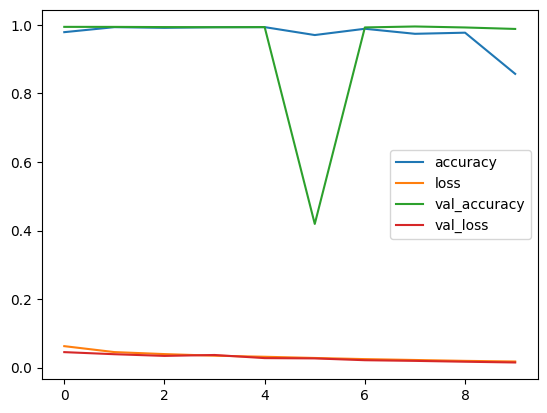

In [ ]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

## 3. Evaluate Model

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    # Unpack the batch
    X_true, y_true = batch
    # Make a prediction
    yhat = model.predict(X_true)

    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()

    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━

In [ ]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.9256875514984131, Recall:0.9235259890556335, Accuracy:0.498495489358902


## 4. Make Prediction

In [ ]:
input_text = vectorizer('You freaking suck! I am going to hit you.')

In [ ]:
input_text.shape

TensorShape([1500])

In [ ]:
input_text = tf.expand_dims(input_text, axis=0)

In [ ]:
input_text.shape

TensorShape([1, 1500])

In [ ]:
res = model.predict(input_text)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


In [ ]:
res.shape

(1, 6)

In [ ]:
res

array([[0.97980624, 0.17467864, 0.9293489 , 0.01884819, 0.8372608 ,
        0.03073514]], dtype=float32)

In [ ]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [ ]:
batch= test.as_numpy_iterator().next()

In [ ]:
batch

(array([[    8,  5014,   558, ...,     0,     0,     0],
        [   76,   708,    12, ...,     0,     0,     0],
        [ 5583, 45497,   139, ...,     0,     0,     0],
        ...,
        [   23,    54,   161, ...,     0,     0,     0],
        [ 1122,     8,   597, ...,     0,     0,     0],
        [71839,     9,  2421, ...,     0,     0,     0]]),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]))

In [ ]:
batch_x, batch_y = batch

In [ ]:
batch_x

array([[    8,  5014,   558, ...,     0,     0,     0],
       [   76,   708,    12, ...,     0,     0,     0],
       [ 5583, 45497,   139, ...,     0,     0,     0],
       ...,
       [   23,    54,   161, ...,     0,     0,     0],
       [ 1122,     8,   597, ...,     0,     0,     0],
       [71839,     9,  2421, ...,     0,     0,     0]])

In [ ]:
batch_y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [ ]:
(model.predict(batch_x) >0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

## 5. Gradio App

In [ ]:
# Load the configuration from the JSON file
with open('/content/drive/MyDrive/comment toxicity /models/vectorizer_config.json', 'r') as f:
    vectorizer_config = json.load(f)

# Recreate the TextVectorization layer using the loaded configuration
vectorizer = TextVectorization.from_config(vectorizer_config)

In [ ]:
model1= tf.keras.models.load_model("/content/drive/MyDrive/comment toxicity /models/CT_epoch_3.h5")

In [ ]:
!pip install gradio jinja2

In [ ]:
import gradio as gr

In [ ]:
print(gr.__version__)

4.31.5


In [ ]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model1.predict(vectorized_comment)

    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx]>0.5)

    return text

In [ ]:
interface = gr.Interface(fn=score_comment,
                         inputs=gr.Textbox(lines=2, placeholder='Comment to score'),
                        outputs='text')

In [ ]:
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://ac5138b8087887f339.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
